In [1]:
# Works best with jupyter-notebook

In [3]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import math
import spatialmath.base as sm

from spatialmath import * 
from collections import namedtuple
from roboticstoolbox import *
import roboticstoolbox.tools.trajectory as tr
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

##### Lecture 4.7

Cartesian interpolation

In [17]:
#Create an initial pose of a “null” pose
T_0=np.eye(4)
T_0

array([[       1,        0,        0,        0],
       [       0,        1,        0,        0],
       [       0,        0,        1,        0],
       [       0,        0,        0,        1]])

In [20]:
#Create a final pose with finite orientation and translational components
T_1=np.dot(sm.transl([1, 2, 3]), sm.rpy2tr([0.6, 0.8, 1.4]))
T_1

array([[  0.6932,   0.3206,   0.6455,        1],
       [ 0.06955,   0.8616,  -0.5027,        2],
       [ -0.7174,   0.3934,    0.575,        3],
       [       0,        0,        0,        1]])

In [26]:
#Create a smooth trajectory between the two poses using the toolbox function ctraj()
#and passing the input arguments of the initial pose, the final pose and the number of time steps.
#The function returns a sequence of homogeneous transformation matrices:
T=tr.ctraj(T_0, T_1, 50)


AttributeError: 'numpy.ndarray' object has no attribute 'interp'

In [13]:
#Compute a trajectory using the toolbox function jtraj(), 
#accepting arguments of the first point, the last point and the number of timesteps:
timesteps=50
out =tr.jtraj(first, last, timesteps)
#tg = jtraj(q0, qf, M)`` is a joint space trajectory where the joint
#coordinates vary from ``q0`` (N) to ``qf`` (N).  A quintic (5th order)
#polynomial is used with default zero boundary conditions for velocity and acceleration.
#return value:
t=out.t #time coordinate
x=out.q #trajectory
xd=out.qd #velocity
xdd=out.qdd #acceleration


<IPython.core.display.Javascript object>


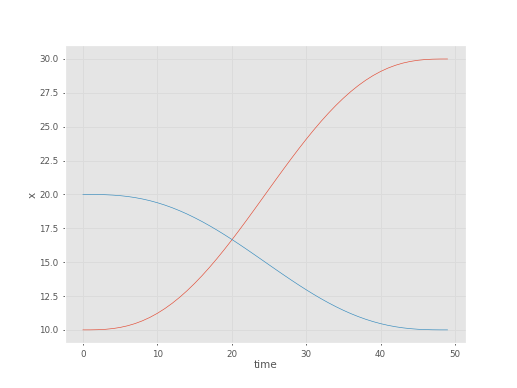

In [17]:
#plot trajectory 
fig1=plt.figure(1)
plt.xlabel('time')
plt.ylabel('x')
plt.plot(x)

<IPython.core.display.Javascript object>


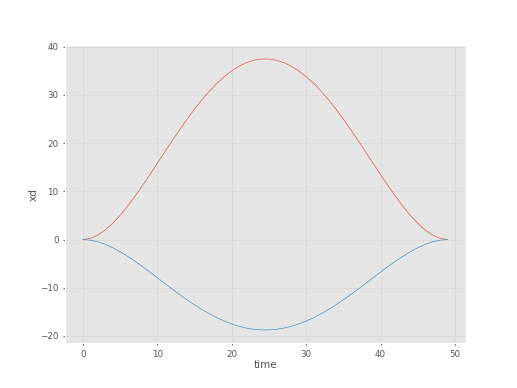

In [15]:
#plot velocity
fig2=plt.figure(2)
plt.xlabel('time')
plt.ylabel('xd')
plt.plot(xd)

In [30]:
#An initial and final velocity can also be specified by supplying additional input arguments. 
#In this case we will ask for the initial velocity to be 0 units/second 
#and the final velocity to be 10 units/second in each axis:
out =tr.jtraj(first, last, timesteps, qd0=[0,0], qd1=[10, 10])
t=out.t #time coordinate
x=out.q #trajectory
xd=out.qd #velocity
xdd=out.qdd #acceleration

ValueError: operands could not be broadcast together with shapes (2,) (14,) 

In [48]:
#A 2D trajectory with via points can also be computed. Set a first point of (40, 50)
#and via points at (60, 30), (40, 10), (20, 30) and returning back to the start position:
start=np.array([40,50])
via=np.array([
    [40,50],
    [60,30],
    [40,10],
    [20,30],
    [40,50]
    ])
print(start)
print(via)

[40 50]
[[40 50]
 [60 30]
 [40 10]
 [20 30]
 [40 50]]


0.6 0.3 [      40       50]
0.7 0.35 [      40       50]
0.7999999999999999 0.39999999999999997 [      40       50]
0.8999999999999999 0.44999999999999996 [      40       50]
0.9999999999999999 0.49999999999999994 [      40       50]
1.0999999999999999 0.5499999999999999 [      40       50]
1.2 0.6 [      40       50]
1.3 0.65 [      40       50]
1.4000000000000001 0.7000000000000001 [      40       50]
0.6 0.05454545454545454 [   41.09    48.91]
0.7 0.06363636363636363 [   41.27    48.73]
0.7999999999999999 0.07272727272727272 [   41.45    48.55]
0.8999999999999999 0.0818181818181818 [   41.64    48.36]
0.9999999999999999 0.0909090909090909 [   41.82    48.18]
1.0999999999999999 0.09999999999999999 [      42       48]
1.2 0.10909090909090909 [   42.18    47.82]
1.3 0.11818181818181818 [   42.36    47.64]
1.4000000000000001 0.1272727272727273 [   42.55    47.45]
1.5000000000000002 0.13636363636363638 [   42.73    47.27]
1.6000000000000003 0.14545454545454548 [   42.91    47.09]
1.70000

<IPython.core.display.Javascript object>


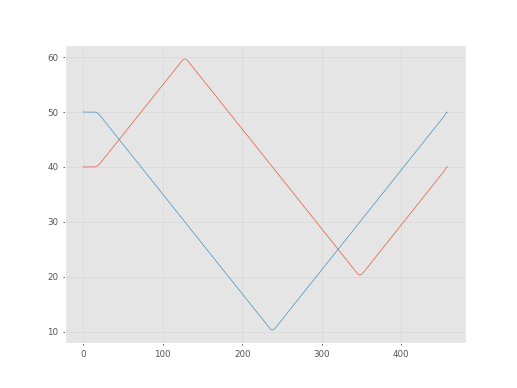

In [49]:
#Compute the trajectory using the toolbox function mstraj() providing the input arguments of the via points, 
#the velocity of 2 units/second, null segment velocities, the start position, the time step of 0.1 seconds 
#and the acceleration time of 1 second:
out=tr.mstraj(via, dt=0.1, tacc=1, qdmax=2, q0=start)

#plot
fig4=plt.figure(4)
plt.plot(out.q)


<IPython.core.display.Javascript object>


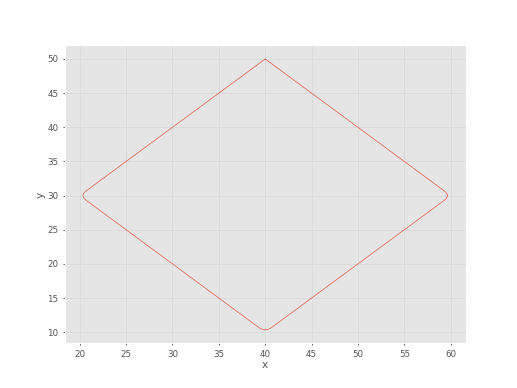

Text(0, 0.5, 'y')

In [50]:
#Plotting the first coordinate versus the second coordinate shows the motion of the point on the xy-plane:
fig5=plt.figure(5)
plt.plot(out.q[:,0], out.q[:,1])
plt.xlabel('x')
plt.ylabel('y')

0.6 0.3 [      40       50]
0.7 0.35 [      40       50]
0.7999999999999999 0.39999999999999997 [      40       50]
0.8999999999999999 0.44999999999999996 [      40       50]
0.9999999999999999 0.49999999999999994 [      40       50]
1.0999999999999999 0.5499999999999999 [      40       50]
1.2 0.6 [      40       50]
1.3 0.65 [      40       50]
1.4000000000000001 0.7000000000000001 [      40       50]
0.6 0.02857142857142857 [   40.57    49.43]
0.7 0.03333333333333333 [   40.67    49.33]
0.7999999999999999 0.03809523809523809 [   40.76    49.24]
0.8999999999999999 0.04285714285714285 [   40.86    49.14]
0.9999999999999999 0.047619047619047616 [   40.95    49.05]
1.0999999999999999 0.052380952380952375 [   41.05    48.95]
1.2 0.05714285714285714 [   41.14    48.86]
1.3 0.06190476190476191 [   41.24    48.76]
1.4000000000000001 0.06666666666666668 [   41.33    48.67]
1.5000000000000002 0.07142857142857144 [   41.43    48.57]
1.6000000000000003 0.07619047619047621 [   41.52    48.48]
1.

<IPython.core.display.Javascript object>


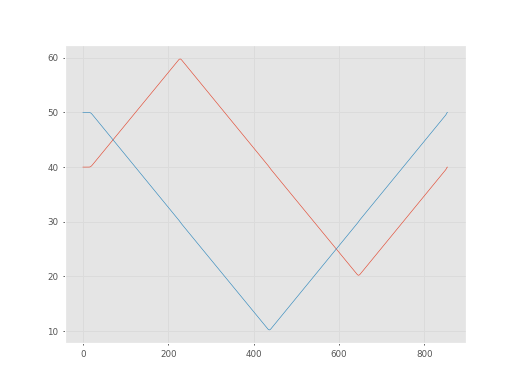

In [51]:
#The velocities of the axes can be specified separately by passing the function a vector, in this case a velocity of 1 unit/second in the x-axis 
#and 3 units/second in the y-axis:
out=tr.mstraj(via, dt=0.1, tacc=1, qdmax=[1,3], q0=start)
#plot
fig6=plt.figure(6)
plt.plot(out.q)


<IPython.core.display.Javascript object>


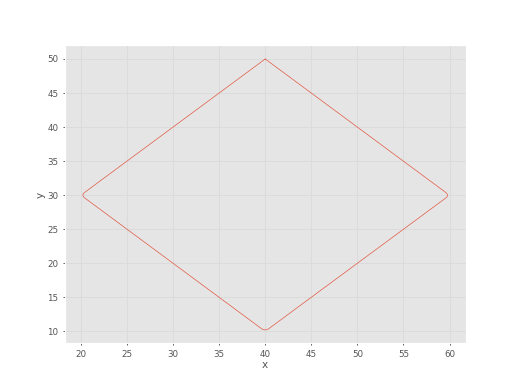

Text(0, 0.5, 'y')

In [52]:
#Plotting the first coordinate versus the second coordinate shows the motion of the point on the xy-plane:
fig7=plt.figure(7)
plt.plot(out.q[:,0], out.q[:,1])
plt.xlabel('x')
plt.ylabel('y')